<a href="https://colab.research.google.com/github/saichandu1427/machine-learning/blob/main/SentimentalAnalysisNLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install nltk


In [2]:
import numpy as np
import pandas as pd
import re    #regular expression for removing special characters in text...
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords


In [3]:
from google.colab import files
uploaded=files.upload()

Saving twitter.csv to twitter.csv


In [4]:
data=pd.read_csv("twitter.csv")
data


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [5]:
data.shape

(14640, 15)

In [6]:
features=data.iloc[:,10].values
labels=data.iloc[:,1].values

In [8]:
#removing special characters
processed_features=[]
for sentence in range(0,len(features)):
# Remove all the special characters
  processed_feature=re.sub(r'\W','',str(features[sentence]))
# remove all single characters
  processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)
# Remove single characters from the start
  processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature)
# Substituting multiple spaces with single space
  processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)
# Removing prefixed 'b'
  processed_feature = re.sub(r'^b\s+', '', processed_feature)
# Converting to Lowercase
  processed_feature = processed_feature.lower()
  processed_features.append(processed_feature)

In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()
print(processed_features)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(processed_features,labels,test_size=0.2,random_state=0)

In [13]:
from sklearn.ensemble import RandomForestClassifier
text_classifier=RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [16]:
prediction=text_classifier.predict(x_test)

In [18]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,prediction))

0.6434426229508197


In [24]:
from sklearn import metrics
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


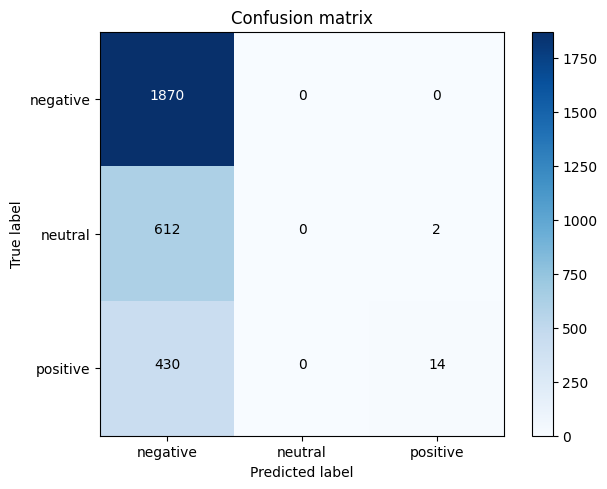

In [25]:
cm = metrics.confusion_matrix(y_test, predictions, labels=['negative', 'neutral', 'positive'])
plot_confusion_matrix(cm, classes=['negative', 'neutral', 'positive'])